In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the required libraries.

from sklearn.cluster import KMeans, k_means #For clustering
from sklearn.decomposition import PCA #Linear Dimensionality reduction.

In [8]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin-1') # or encoding='cp1252'
 #Loading the dataset.

In [9]:
## Preprocessing 

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
df.shape 

(2823, 25)

In [11]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [13]:
df.isnull()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [14]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [15]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [16]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1) #Dropping the categorical uneccessary columns along with columns having null values. Can't fill the null values are there are alot of null values.


In [17]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [18]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [19]:
# Checking the categorical columns.

df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [20]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [21]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [22]:
productline = pd.get_dummies(df['PRODUCTLINE']) #Converting the categorical columns. 
Dealsize = pd.get_dummies(df['DEALSIZE'])

In [23]:
df = pd.concat([df,productline,Dealsize], axis = 1)

In [24]:
df_drop  = ['COUNTRY','PRODUCTLINE','DEALSIZE'] #Dropping Country too as there are alot of countries. 
df = df.drop(df_drop, axis=1)

In [25]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes #Converting the datatype.

In [26]:
df.drop('ORDERDATE', axis=1, inplace=True) #Dropping the Orderdate as Month is already included.

In [27]:
df.dtypes #All the datatypes are converted into numeric


QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars           bool
Motorcycles            bool
Planes                 bool
Ships                  bool
Trains                 bool
Trucks and Buses       bool
Vintage Cars           bool
Large                  bool
Medium                 bool
Small                  bool
dtype: object

In [28]:
## Plotting the Elbow Plot to determine the number of clusters.

In [50]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [52]:
distortions = [] # Within Cluster Sum of Squares from the centroid
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)   #Appeding the intertia to the Distortions 

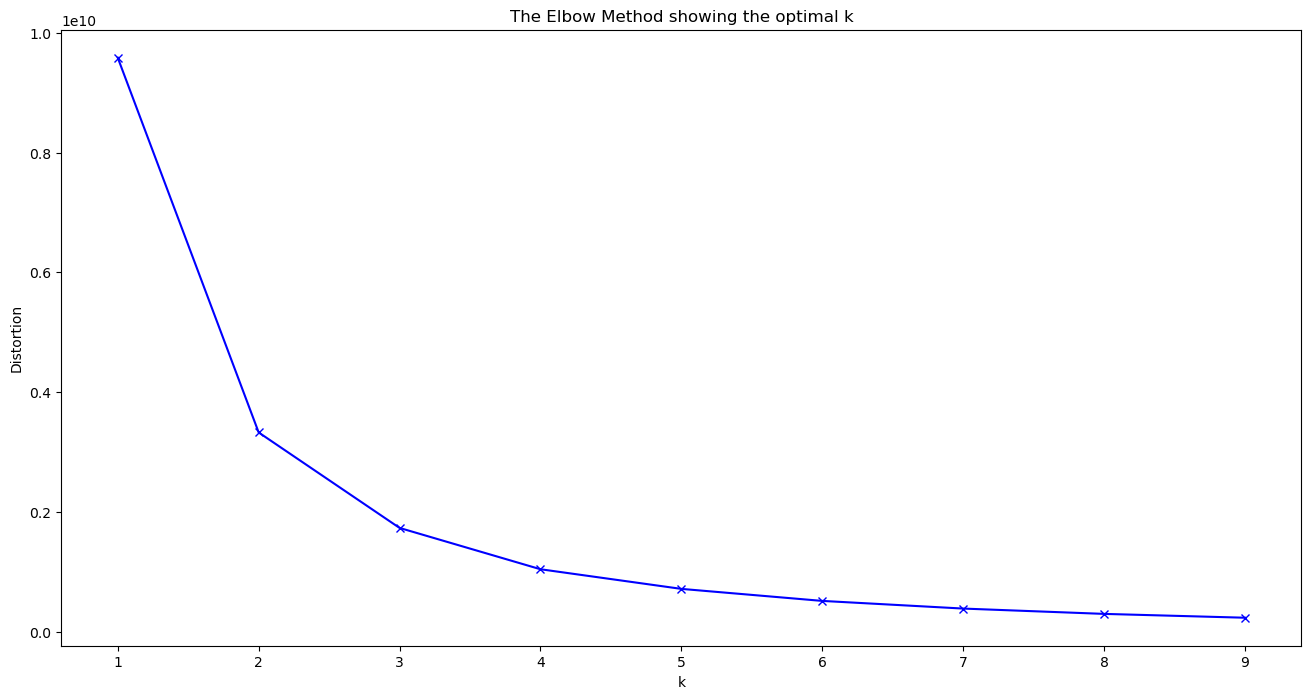

In [53]:

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [54]:
## As the number of k increases Inertia decreases. 
## Observations: A Elbow can be observed at 3 and after that the curve decreases gradually. 

X_train = df.values #Returns a numpy array.

In [55]:
X_train.shape


(2823, 19)

In [56]:
warnings.filterwarnings("ignore", category=FutureWarning)

model = KMeans(n_clusters=3,random_state=2) #Number of cluster = 3
model = model.fit(X_train) #Fitting the values to create a model.
predictions = model.predict(X_train) #Predicting the cluster values (0,1,or 2)

In [57]:
unique,counts = np.unique(predictions,return_counts=True)

In [58]:
counts = counts.reshape(1,3)

In [59]:
counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])

In [60]:
counts_df.head()

,Cluster1,Cluster2,Cluster3
0,1360,375,1088


In [61]:
## Visualization 

pca = PCA(n_components=2) #Converting all the features into 2 columns to make it easy to visualize using Principal COmponent Analysis.

In [62]:
reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2']) #Creating a DataFrame.

In [63]:
reduced_X.head()

,PCA1,PCA2
0,-682.488323,-42.819535
1,-787.665502,-41.694991
2,330.732170,-26.481208
3,193.040232,-26.285766
4,1651.532874,-6.891196


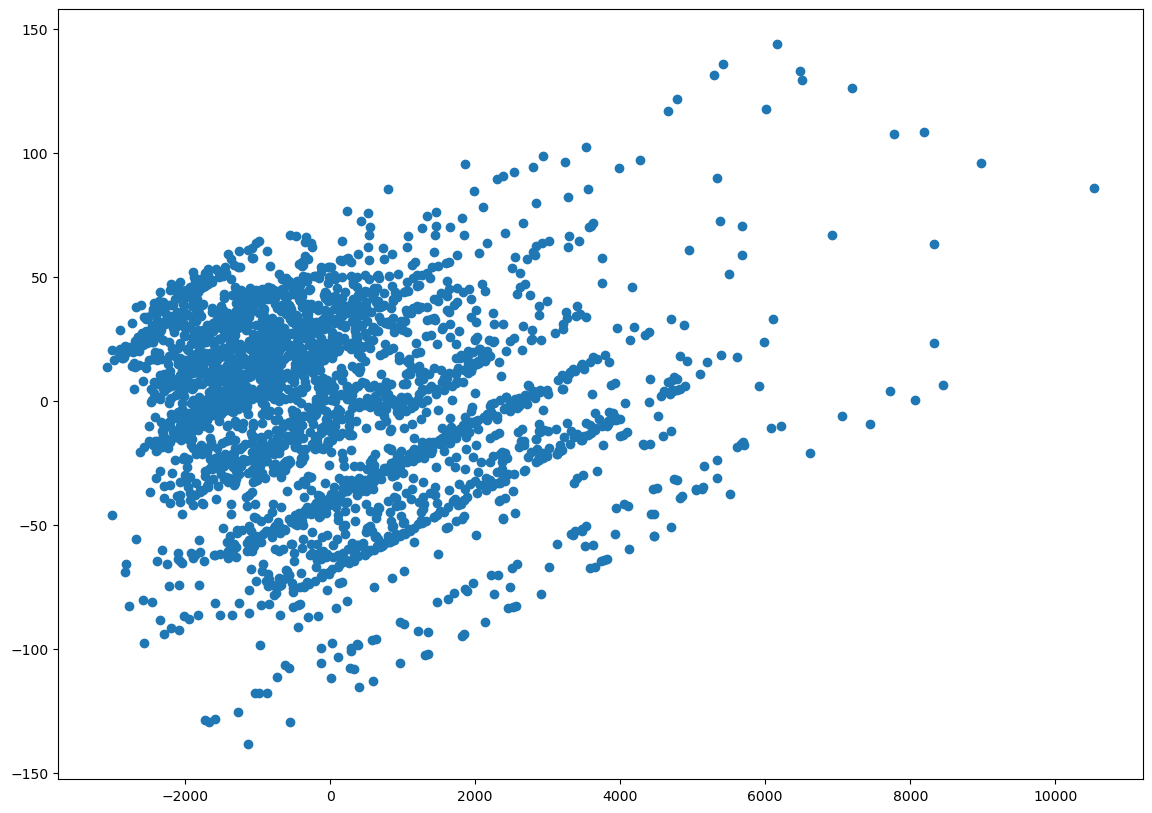

In [64]:
#Plotting the normal Scatter Plot
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])

In [65]:
model.cluster_centers_ #Finding the centriods. (3 Centriods in total. Each Array contains a centroids for particular feature )

array([[ 3.07860294e+01,  7.00256985e+01,  6.66985294e+00,
         2.11891932e+03,  2.71764706e+00,  7.09338235e+00,
         2.00381397e+03,  7.84757353e+01,  6.25088235e+01,
         2.64705882e-01,  1.21323529e-01,  1.29411765e-01,
         1.00735294e-01,  3.75000000e-02,  9.26470588e-02,
         2.53676471e-01,  2.08166817e-17,  5.73529412e-02,
         9.42647059e-01],
       [ 4.46106667e+01,  9.98936800e+01,  5.78400000e+00,
         7.08806629e+03,  2.70133333e+00,  7.03733333e+00,
         2.00389067e+03,  1.45581333e+02,  3.17040000e+01,
         5.33333333e-01,  1.06666667e-01,  7.20000000e-02,
         2.13333333e-02,  1.33333333e-02,  1.30666667e-01,
         1.22666667e-01,  4.18666667e-01,  5.81333333e-01,
        -6.10622664e-16],
       [ 3.71957721e+01,  9.51038511e+01,  6.44669118e+00,
         4.12947951e+03,  2.72334559e+00,  7.11029412e+00,
         2.00379044e+03,  1.13051471e+02,  5.04604779e+01,
         3.74080882e-01,  1.15808824e-01,  9.46691176e-02,
    

In [66]:
reduced_centers = pca.transform(model.cluster_centers_) #Transforming the centroids into 3 in x and y coordinates

In [67]:
reduced_centers

array([[-1.43523424e+03,  2.54268709e+00],
       [ 3.53456611e+03,  3.35030029e+00],
       [ 5.75787016e+02, -4.33310390e+00]])

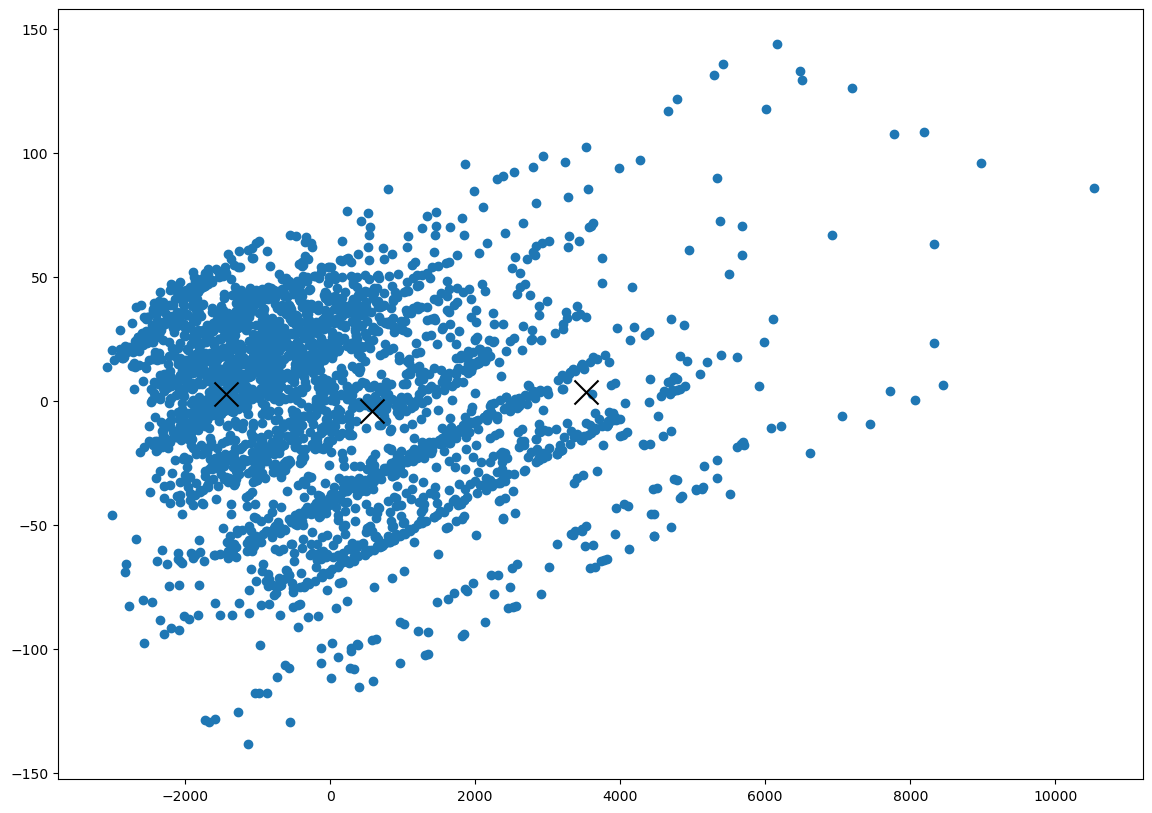

In [68]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300) #Plotting the centriods

In [69]:
reduced_X['Clusters'] = predictions #Adding the Clusters to the reduced dataframe.

In [70]:
reduced_X.head()

,PCA1,PCA2,Clusters
0,-682.488323,-42.819535,0
1,-787.665502,-41.694991,0
2,330.732170,-26.481208,2
3,193.040232,-26.285766,2
4,1651.532874,-6.891196,2


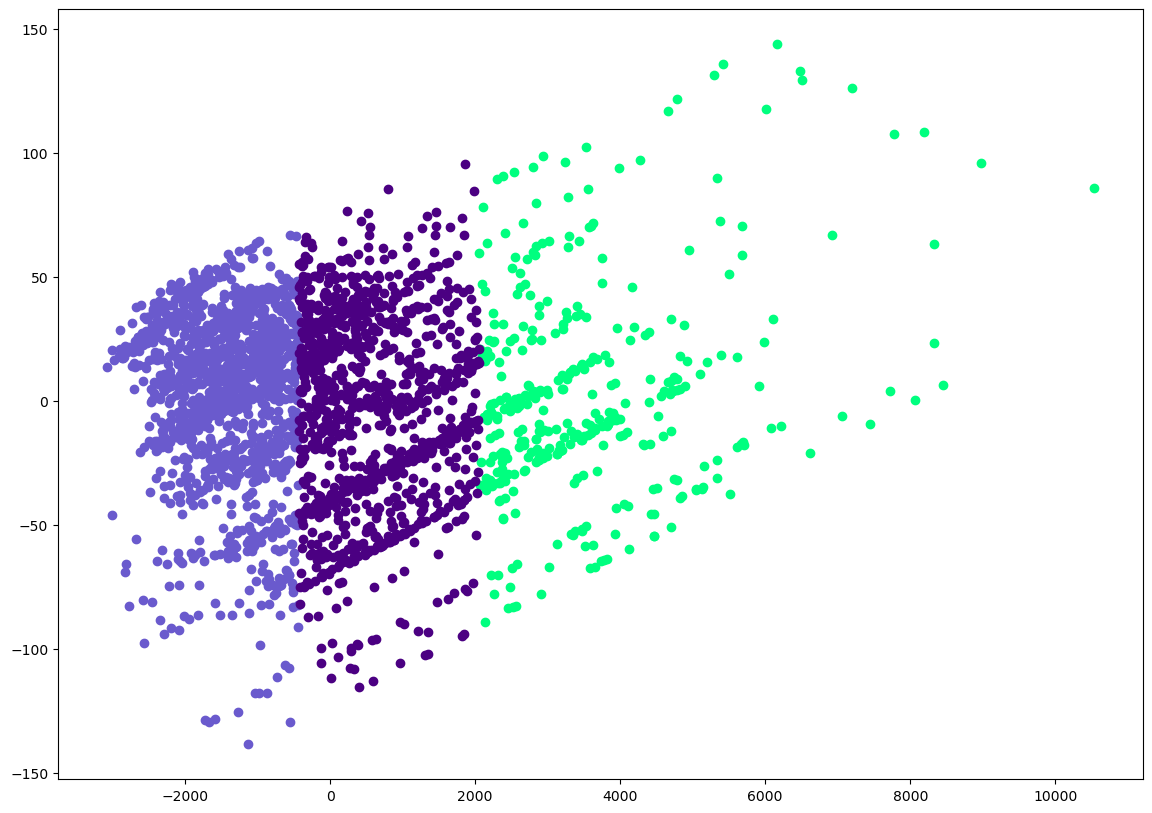

In [71]:
#Plotting the clusters 
plt.figure(figsize=(14,10))
#                     taking the cluster number and first column           taking the same cluster number and second column      Assigning the color
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],color='slateblue')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],color='springgreen')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],color='indigo')

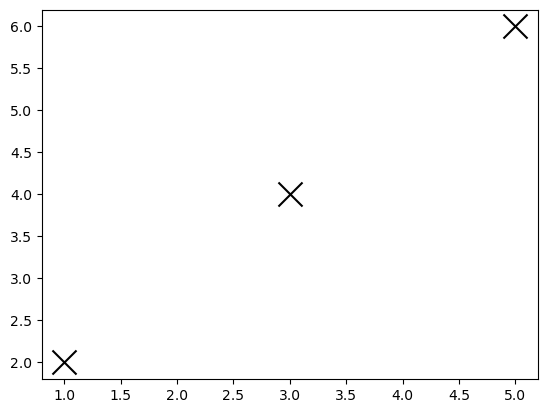

In [80]:
# Convert reduced_centers to a NumPy array
# reduced_centers = np.array(reduced_centers)

# Now you can access the elements using indices
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)